In [21]:
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller

plt.style.use('fivethirtyeight')

In [22]:
# symbol = "^SPX"
symbol = "^DAX"
units = {"^SPX": "USD ($)", "^DAX": "EUR (€)"}

In [23]:
df = web.DataReader(symbol, "stooq", start="2011-01-01", end="2023-12-31").iloc[::-1]

In [24]:
df = df.filter(['Close'])
df.dropna(inplace=True)

In [25]:
df

,Close
Date,
2011-01-03,6989.74
2011-01-04,6975.35
2011-01-05,6939.82
2011-01-06,6981.39
2011-01-07,6947.84
...,...
2023-12-15,16751.44
2023-12-18,16650.55
2023-12-19,16744.41


In [26]:
df.dropna()

,Close
Date,
2011-01-03,6989.74
2011-01-04,6975.35
2011-01-05,6939.82
2011-01-06,6981.39
2011-01-07,6947.84
...,...
2023-12-15,16751.44
2023-12-18,16650.55
2023-12-19,16744.41


In [27]:
log_rets = np.log(df / df.shift(1)).dropna()
log_rets

,Close
Date,
2011-01-04,-0.002061
2011-01-05,-0.005107
2011-01-06,0.005972
2011-01-07,-0.004817
2011-01-10,-0.013152
...,...
2023-12-15,-0.000047
2023-12-18,-0.006041
2023-12-19,0.005621


Text(0.5, 1.0, '^DAX')

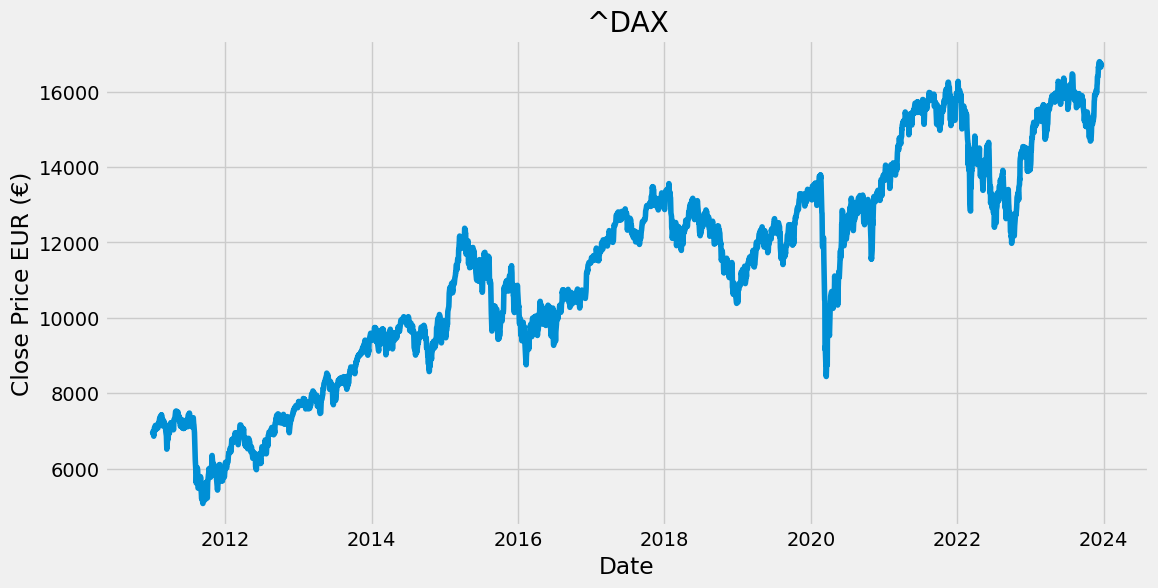

In [28]:
plt.figure(figsize=(12,6))
plt.plot(df)
plt.xlabel("Date")
plt.ylabel(f"Close Price {units[symbol]}")
plt.title(symbol)

Text(0.5, 1.0, '^DAX')

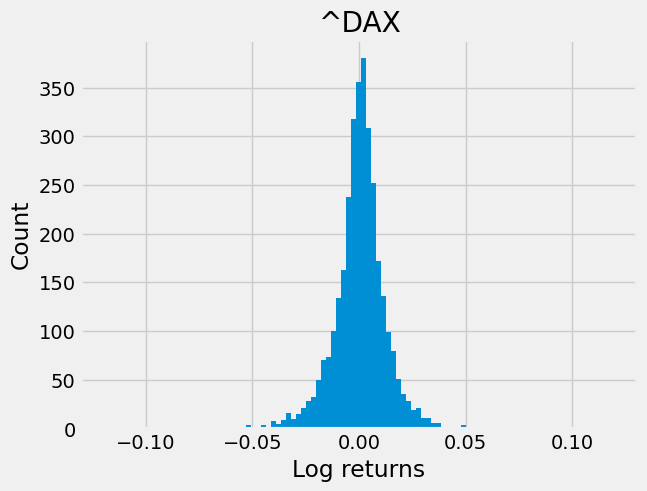

In [29]:
plt.figure()
bins = plt.hist(log_rets, bins=100)
plt.xlabel('Log returns')
plt.ylabel('Count')
plt.xlim([bins[1][0], -bins[1][0]])
plt.title(symbol)

In [30]:
log_rets.mean()

Close    0.000264
dtype: float64

Volatitlity = variance

the higher the volatility, the higher the expected returns

In [31]:
log_rets.std()

Close    0.012648
dtype: float64

# Test for stationarity

In [32]:
adfuller(df)

(-1.0949315319773822,
 0.7170889132981776,
 0,
 3294,
 {'1%': -3.4323367648004606,
  '5%': -2.8624178351722858,
  '10%': -2.5672372898489977},
 41327.114766170875)

In [33]:
adfuller(log_rets)

(-16.96099105766896,
 9.308767933452696e-30,
 10,
 3283,
 {'1%': -3.432343426858439,
  '5%': -2.8624207777608968,
  '10%': -2.567238856417868},
 -19248.957658318275)

# Add lags

In [34]:
def add_lags(df, lags=20):
    cols = []
    new_df = df.copy(deep=True)
    for lag in range(1, lags + 1):
        col = f"lag_{lag}"
        new_df[col] = df.shift(lag)
        cols.append(col)
    new_df.dropna(inplace=True)
    return new_df, cols

In [35]:
lagged, cols = add_lags(log_rets)

In [36]:
lagged

,Close,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,...,lag_11,lag_12,lag_13,lag_14,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20
Date,,,,,,,,,,,,,,,,,,,,,
2011-02-01,0.014976,-0.003571,-0.007403,0.003953,0.009635,-0.001240,0.000757,0.005416,-0.008292,-0.008532,...,0.000333,0.000083,0.000895,0.018160,0.012249,-0.013152,-0.004817,0.005972,-0.005107,-0.002061
2011-02-02,-0.000084,0.014976,-0.003571,-0.007403,0.003953,0.009635,-0.001240,0.000757,0.005416,-0.008292,...,0.009196,0.000333,0.000083,0.000895,0.018160,0.012249,-0.013152,-0.004817,0.005972,-0.005107
2011-02-03,0.001392,-0.000084,0.014976,-0.003571,-0.007403,0.003953,0.009635,-0.001240,0.000757,0.005416,...,-0.008532,0.009196,0.000333,0.000083,0.000895,0.018160,0.012249,-0.013152,-0.004817,0.005972
2011-02-04,0.003127,0.001392,-0.000084,0.014976,-0.003571,-0.007403,0.003953,0.009635,-0.001240,0.000757,...,-0.008292,-0.008532,0.009196,0.000333,0.000083,0.000895,0.018160,0.012249,-0.013152,-0.004817
2011-02-07,0.009298,0.003127,0.001392,-0.000084,0.014976,-0.003571,-0.007403,0.003953,0.009635,-0.001240,...,0.005416,-0.008292,-0.008532,0.009196,0.000333,0.000083,0.000895,0.018160,0.012249,-0.013152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-15,-0.000047,-0.000825,-0.001531,-0.000160,0.002099,0.007801,-0.001649,0.007432,0.007794,0.000441,...,0.003025,0.010808,0.001646,-0.003946,0.002171,0.002310,0.003597,-0.000050,-0.001121,0.008361
2023-12-18,-0.006041,-0.000047,-0.000825,-0.001531,-0.000160,0.002099,0.007801,-0.001649,0.007432,0.007794,...,0.011167,0.003025,0.010808,0.001646,-0.003946,0.002171,0.002310,0.003597,-0.000050,-0.001121
2023-12-19,0.005621,-0.006041,-0.000047,-0.000825,-0.001531,-0.000160,0.002099,0.007801,-0.001649,0.007432,...,0.000441,0.011167,0.003025,0.010808,0.001646,-0.003946,0.002171,0.002310,0.003597,-0.000050


In [37]:
weights = np.linalg.lstsq(lagged[cols], log_rets[-len(lagged):], rcond=-1)[0]

In [38]:
weights.shape

(20, 1)

Text(0, 0.5, 'Weight')

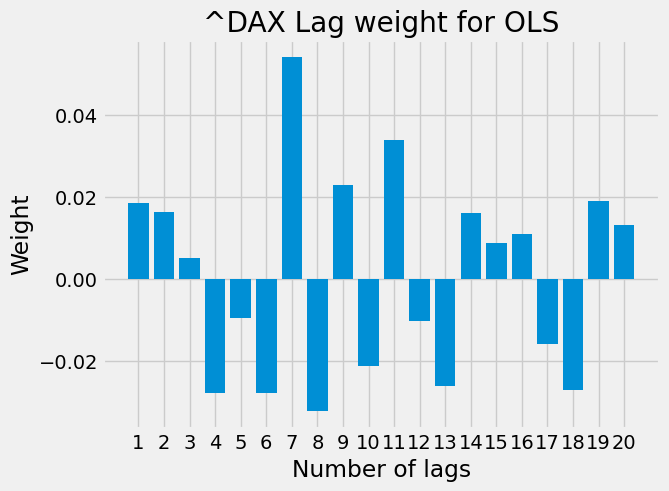

In [39]:
plt.figure()
plt.bar([col.split('_')[1] for col in cols], weights.flatten())
plt.title(f"{symbol} Lag weight for OLS")
plt.xlabel("Number of lags")
plt.ylabel("Weight")

In [47]:
binaries = np.digitize(lagged, bins=[0])
binaries

array([[1, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 1, 0],
       [1, 0, 1, ..., 0, 0, 1],
       ...,
       [1, 0, 0, ..., 1, 1, 0],
       [0, 1, 0, ..., 1, 1, 1],
       [0, 0, 1, ..., 0, 1, 1]])

In [49]:
binaries.shape

(3274, 21)

## Number of patters

In [48]:
2 ** len(cols)

1048576

# Split into train and test

In [54]:
log_rets_close = np.array(lagged['Close'])
log_rets_close.shape

(3274,)

In [63]:
n_train = len(lagged.loc[:"2022-01-01"])

In [64]:
n_valid = len(lagged.loc["2022-01-01":"2023-01-01"])

In [65]:
x_train = binaries[:n_train, 1:]
y_train = binaries[:n_train, 0]
log_train = log_rets_close[:n_train]

x_valid = binaries[n_train:n_train+n_valid, 1:]
y_valid = binaries[n_train:n_train+n_valid, 0]
log_valid = log_rets_close[n_train:n_train+n_valid]

x_test = binaries[n_train+n_valid:, 1:]
y_test = binaries[n_train+n_valid:, 0]
log_test = log_rets_close[n_train+n_valid:]